# Anomaly Detection Example 

Detecting data anomalies within a dataset is a growing field of machine learning. This notebook uses a simple moving average metric to do a simple anomaly detection example

In [1]:
from __future__ import division
from itertools import count
import matplotlib.pyplot as plt
from numpy import linspace, loadtxt, ones, convolve
import numpy as np
import pandas as pd
import collections
from random import randint
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline

In [2]:
!mkdir -p dataset
!wget -c -b http://www-personal.umich.edu/~mejn/cp/data/sunspots.txt -P dataset

Continuing in background, pid 6225.
Output will be written to ‘wget-log.2’.


In [3]:
data = loadtxt("dataset/sunspots.txt", float)

In [4]:
data = pd.DataFrame(data, columns=['Months', 'SunSpots'])
data.head()

,Months,SunSpots
0,0.0,58.0
1,1.0,62.6
2,2.0,70.0
3,3.0,55.7
4,4.0,85.0


In [5]:
# function for calc of moving average metric

def moving_average(data, window_size):
    """ Computes moving average using discrete linear convolution of two 1D sequences
    
    param data: (pandas.Series) independent variable
    param window_size: rolling window size for the average to be calculated over
    return ndarray of linear convolution
    """
    
    # this line simply creates an array of length window_size gives each value in the array 1/window_size
    # this just makes it so we can use convolution to calculate our moving average over our window size 
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')

In [6]:
def explain_anomalies(y, window_size, sigma=3.0):
    """ Helps explore anomalies in data
    param y: independent variable
    param window_size: size of moving average window calculation
    param sigma: value for the standard deviation to be used
    
    returns a dictionary of the form: {standard_deviation: int, anomalies: {index: value}}
    """
    
    avg = moving_average(y, window_size).tolist()
    residual = y - avg
    # get variation in distribution of residual
    std = np.std(residual)
    return {'standard_deviation': round(std, 3),
            'anomalies': collections.OrderedDict([(index, y_i) for
                                                        index, y_i, avg_i in zip(count(), y, avg)
                                                    if (y_i > avg_i + (sigma*std)) or (y_i < avg_i - (sigma*std))]
                                                )}

In [7]:
def plot_results(x, y, window_size, sigma_value=3):
    plt.figure(figsize=(15,8))
    plt.plot(x, y, 'k.')
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='green')
    plt.xlim(0, 1000)
    
    events = {}
    events = explain_anomalies(y, window_size)
    
    x_anomaly = np.fromiter(events['anomalies'].keys(), dtype=int, count=len(events['anomalies']))
    y_anomaly = np.fromiter(events['anomalies'].values(), dtype=float, count=len(events['anomalies']))
    plt.plot(x_anomaly, y_anomaly, 'r*', markersize=12)

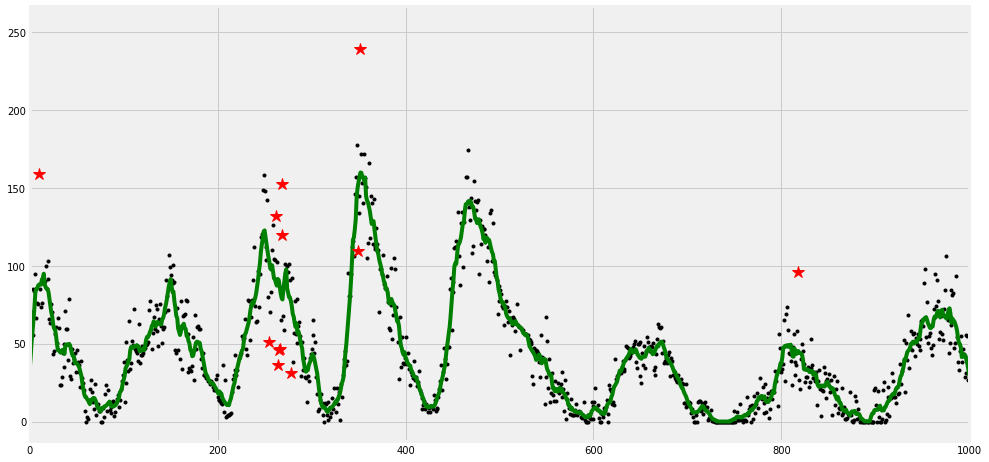

In [8]:
x = data['Months']
y = data['SunSpots']

plot_results(x, y, 10)